In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import statsmodels.api as sm
import math

%matplotlib inline 

from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#pip install category-encoders
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset

weather_AUS = pd.read_csv('weatherAUS.csv') 

weather_AUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
weather_AUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
# drop duplicated values

AUS_droped_duplicates = weather_AUS.drop_duplicates(subset = None, keep = 'first')

In [5]:
# acknowleding null values 

AUS_droped_duplicates.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
# fill in the null values with the first and last of the data set 

AUS_droped_duplicates.fillna(method = 'pad', inplace = True)

#recheck null value count 

AUS_droped_duplicates.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      5939
Sunshine         5939
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
dtype: int64

In [7]:
# Drop Evaporation and Susnhine columns 

AUS_droped_duplicates.drop(columns = ['Evaporation', 'Sunshine'], inplace = True)

AUS_droped_duplicates.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         2
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [8]:
AUS_droped_duplicates = AUS_droped_duplicates.fillna(0)

In [9]:
AUS_droped_duplicates.shape

(142193, 22)

In [10]:
AUS_droped_duplicates.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.189029,23.227533,2.355994,39.405147,14.008819,18.827959,68.871935,51.361009,1017.887300,1015.524540,4.767569,4.620375,16.963827,21.696826,2.360682
std,6.404056,7.118046,8.467103,13.603700,8.897576,9.055098,19.246488,20.912091,6.973906,6.876914,2.865015,2.781666,6.511207,6.960483,8.477969
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,30.000000,7.000000,13.000000,57.000000,36.000000,1013.500000,1011.000000,2.000000,2.000000,12.200000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,37.000000,13.000000,19.000000,70.000000,52.000000,1017.900000,1015.500000,6.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1019.900000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [11]:
AUS_droped_duplicates.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736563,0.103242,0.157133,0.173718,0.173020,-0.229836,-0.003465,-0.425232,-0.438933,-0.020822,-0.096348,0.901911,0.707889,0.124471
MaxTemp,0.736563,1.000000,-0.073989,0.063705,0.014004,0.046515,-0.494748,-0.505011,-0.297003,-0.385265,-0.249851,-0.265235,0.887223,0.979948,-0.044177
Rainfall,0.103242,-0.073989,1.000000,0.121347,0.085963,0.055316,0.217948,0.244702,-0.158749,-0.121836,0.137011,0.111264,0.010231,-0.075787,0.301908
WindGustSpeed,0.157133,0.063705,0.121347,1.000000,0.590461,0.612568,-0.211193,-0.029615,-0.409528,-0.372141,0.008086,0.059246,0.133172,0.026988,0.149659
WindSpeed9am,0.173718,0.014004,0.085963,0.590461,1.000000,0.488396,-0.265388,-0.024951,-0.200156,-0.155588,-0.081935,0.001917,0.126560,-0.000156,0.068211
WindSpeed3pm,0.173020,0.046515,0.055316,0.612568,0.488396,1.000000,-0.128856,0.007174,-0.256983,-0.225922,-0.031283,-0.028660,0.158238,0.022514,0.048029
Humidity9am,-0.229836,-0.494748,0.217948,-0.211193,-0.265388,-0.128856,1.000000,0.661300,0.113815,0.159275,0.339279,0.236192,-0.465042,-0.486186,0.168019
Humidity3pm,-0.003465,-0.505011,0.244702,-0.029615,-0.024951,0.007174,0.661300,1.000000,-0.038150,0.034819,0.349914,0.336271,-0.228477,-0.557710,0.300640
Pressure9am,-0.425232,-0.297003,-0.158749,-0.409528,-0.200156,-0.256983,0.113815,-0.038150,1.000000,0.961149,-0.121006,-0.078063,-0.383525,-0.257593,-0.155058
Pressure3pm,-0.438933,-0.385265,-0.121836,-0.372141,-0.155588,-0.225922,0.159275,0.034819,0.961149,1.000000,-0.075784,-0.036553,-0.430836,-0.353196,-0.156678


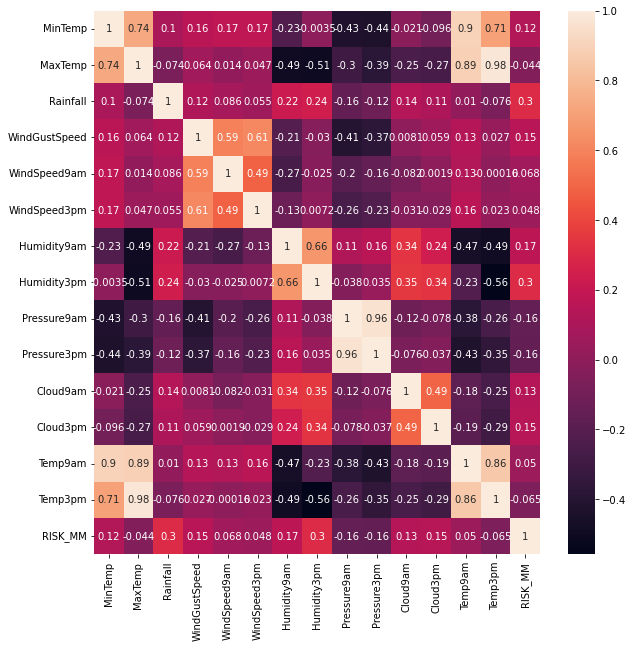

In [12]:
# build a heatmap dipalying the correlation of the dataframe

fig = plt.figure(figsize = (10,10))
sns.heatmap(AUS_droped_duplicates.corr(),annot = True)
plt.show()

In [13]:
ausvif = AUS_droped_duplicates.drop(columns = ['WindSpeed9am', 'WindSpeed3pm'])

ausvif.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,44.0,25.0,1010.6,1007.8,8.0,0.0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# drop categorical data 

vif = ausvif.drop(columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
                            'RainTomorrow'])
vif.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,44.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0.0
1,7.4,25.1,0.0,44.0,44.0,25.0,1010.6,1007.8,8.0,0.0,17.2,24.3,0.0
2,12.9,25.7,0.0,46.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,24.0,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,1.0
4,17.5,32.3,1.0,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


In [16]:
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])]
vif_df['variable'] = vif.columns
vif_df

,VIF,variable
0,38.692253,MinTemp
1,384.321879,MaxTemp
2,1.282085,Rainfall
3,11.086794,WindGustSpeed
4,46.861578,Humidity9am
5,38.107748,Humidity3pm
6,363461.041740,Pressure9am
7,361655.547104,Pressure3pm
8,5.559665,Cloud9am
9,5.330984,Cloud3pm


In [17]:
# drop columns witha vif score < 10 

aus = AUS_droped_duplicates.drop(columns = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'Pressure9am',
                                            'Pressure3pm', 'Temp9am', 'Temp3pm', 
                                            'Humidity9am', 'Humidity3pm'])

aus.head()

,Date,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,0.6,W,W,WNW,20.0,24.0,8.0,0.0,No,0.0,No
1,2008-12-02,Albury,0.0,WNW,NNW,WSW,4.0,22.0,8.0,0.0,No,0.0,No
2,2008-12-03,Albury,0.0,WSW,W,WSW,19.0,26.0,8.0,2.0,No,0.0,No
3,2008-12-04,Albury,0.0,NE,SE,E,11.0,9.0,8.0,2.0,No,1.0,No
4,2008-12-05,Albury,1.0,W,ENE,NW,7.0,20.0,7.0,8.0,No,0.2,No


In [18]:
# removing day from date column 

aus['Date'] = pd.to_datetime(aus['Date'], dayfirst=True)

aus['Date'] = aus['Date'].astype(str).str.replace('-', '')

aus['Date'] = np.where(aus['Date'].str.contains('/'), 
                                    pd.to_datetime(aus['Date']).dt.strftime('%m/%Y'), 
                                    pd.to_datetime(aus['Date'], dayfirst=True).dt.strftime('%m/%Y'))

aus.head()

,Date,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow
0,12/2008,Albury,0.6,W,W,WNW,20.0,24.0,8.0,0.0,No,0.0,No
1,12/2008,Albury,0.0,WNW,NNW,WSW,4.0,22.0,8.0,0.0,No,0.0,No
2,12/2008,Albury,0.0,WSW,W,WSW,19.0,26.0,8.0,2.0,No,0.0,No
3,12/2008,Albury,0.0,NE,SE,E,11.0,9.0,8.0,2.0,No,1.0,No
4,12/2008,Albury,1.0,W,ENE,NW,7.0,20.0,7.0,8.0,No,0.2,No


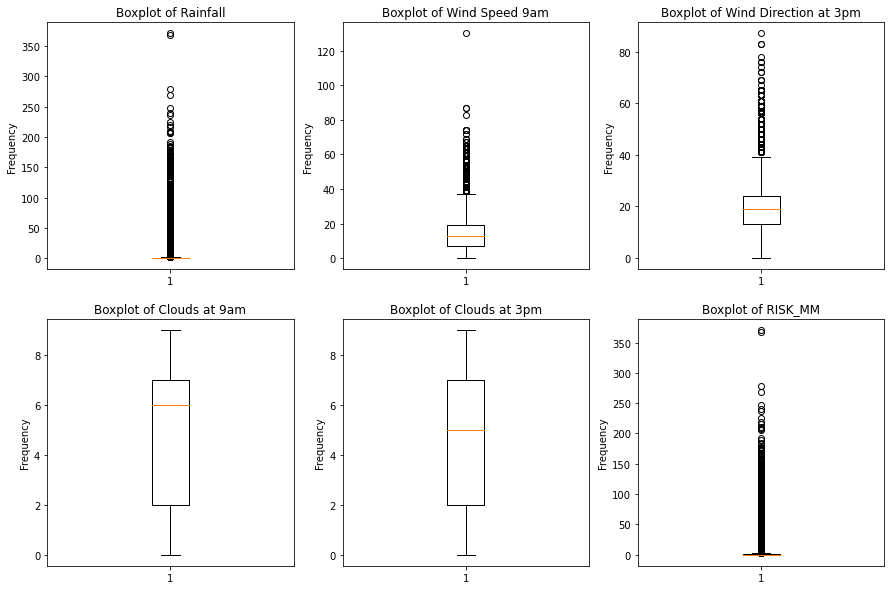

In [19]:
fig= plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
plt.boxplot(aus['Rainfall'])
plt.ylabel('Frequency')
plt.title('Boxplot of Rainfall')

plt.subplot(2,3,2)
plt.boxplot(aus['WindSpeed9am'])
plt.ylabel('Frequency')
plt.title('Boxplot of Wind Speed 9am')

plt.subplot(2,3,3)
plt.boxplot(aus['WindSpeed3pm'])
plt.ylabel('Frequency')
plt.title('Boxplot of Wind Direction at 3pm')

plt.subplot(2,3,4)
plt.boxplot(aus['Cloud9am'])
plt.ylabel('Frequency')
plt.title('Boxplot of Clouds at 9am')

plt.subplot(2,3,5)
plt.boxplot(aus["Cloud3pm"])
plt.ylabel('Frequency')
plt.title('Boxplot of Clouds at 3pm')

plt.subplot(2,3,6)
plt.boxplot(aus['RISK_MM'])
plt.ylabel('Frequency')
plt.title('Boxplot of RISK_MM');

plt.show()

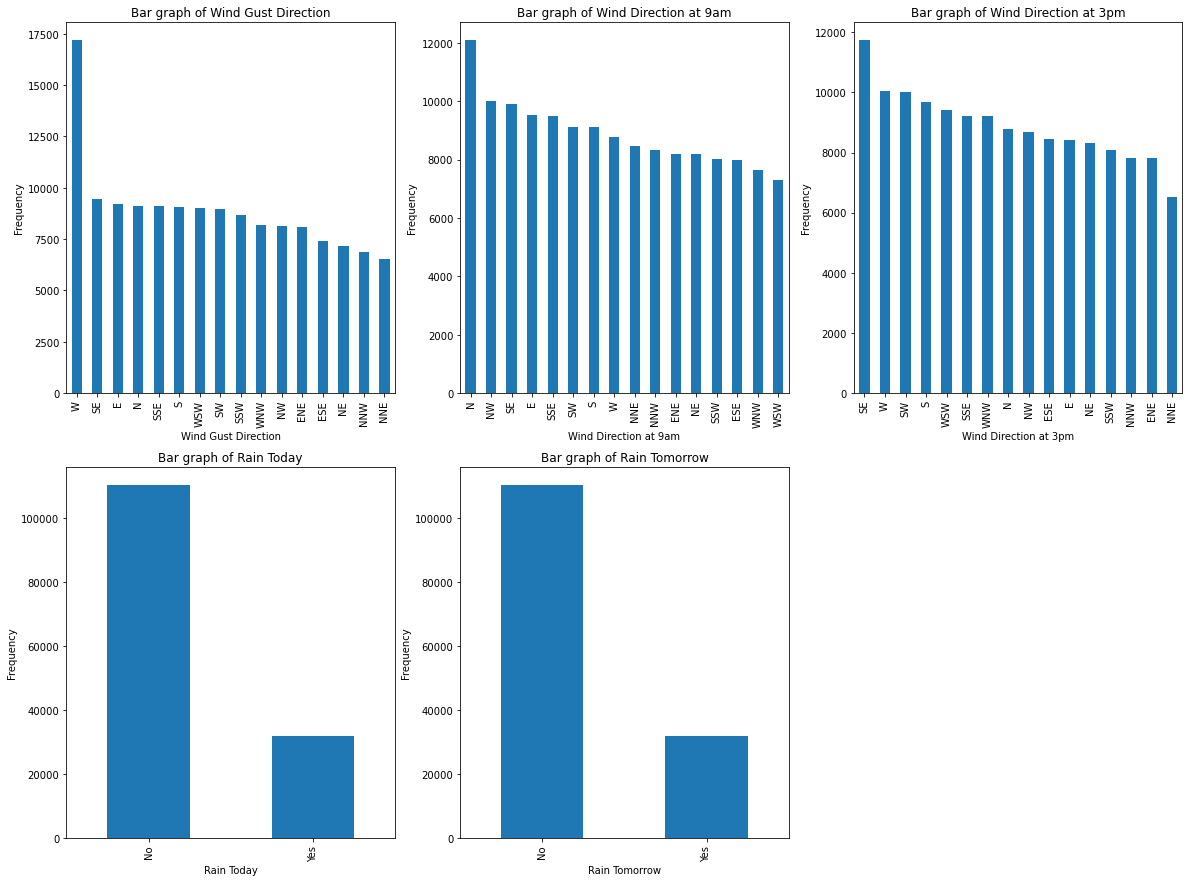

In [20]:
fig= plt.figure(figsize = (20,15))

plt.subplot(2,3,1)
aus["WindGustDir"].value_counts().plot(kind= 'bar')
plt.xlabel("Wind Gust Direction")
plt.ylabel("Frequency")
plt.title("Bar graph of Wind Gust Direction")

plt.subplot(2,3,2)
aus["WindDir9am"].value_counts().plot(kind= 'bar')
plt.xlabel("Wind Direction at 9am")
plt.ylabel("Frequency")
plt.title("Bar graph of Wind Direction at 9am")

plt.subplot(2,3,3)
aus["WindDir3pm"].value_counts().plot(kind= 'bar')
plt.xlabel("Wind Direction at 3pm")
plt.ylabel("Frequency")
plt.title("Bar graph of Wind Direction at 3pm")

plt.subplot(2,3,4)
aus["RainToday"].value_counts().plot(kind= 'bar')
plt.xlabel("Rain Today")
plt.ylabel("Frequency")
plt.title("Bar graph of Rain Today")
          
plt.subplot(2,3,5)
aus["RainTomorrow"].value_counts().plot(kind= 'bar')
plt.xlabel("Rain Tomorrow")
plt.ylabel("Frequency")
plt.title("Bar graph of Rain Tomorrow")

plt.show()

In [21]:
# create a boxplot that groups by the location 
group_by_date = aus.groupby(['Date'], as_index = False)[["Rainfall"]].mean()
group_by_loc = aus.groupby(['Location'], as_index = False)[["Rainfall"]].mean()
group_by_date.sort_values(by = 'Date', ascending = True)

,Date,Rainfall
0,01/2008,1.412903
1,01/2009,2.116224
2,01/2010,2.190605
3,01/2011,3.217165
4,01/2012,3.227991
...,...,...
108,12/2011,2.759288
109,12/2013,1.200000
110,12/2014,2.498700
111,12/2015,2.461814


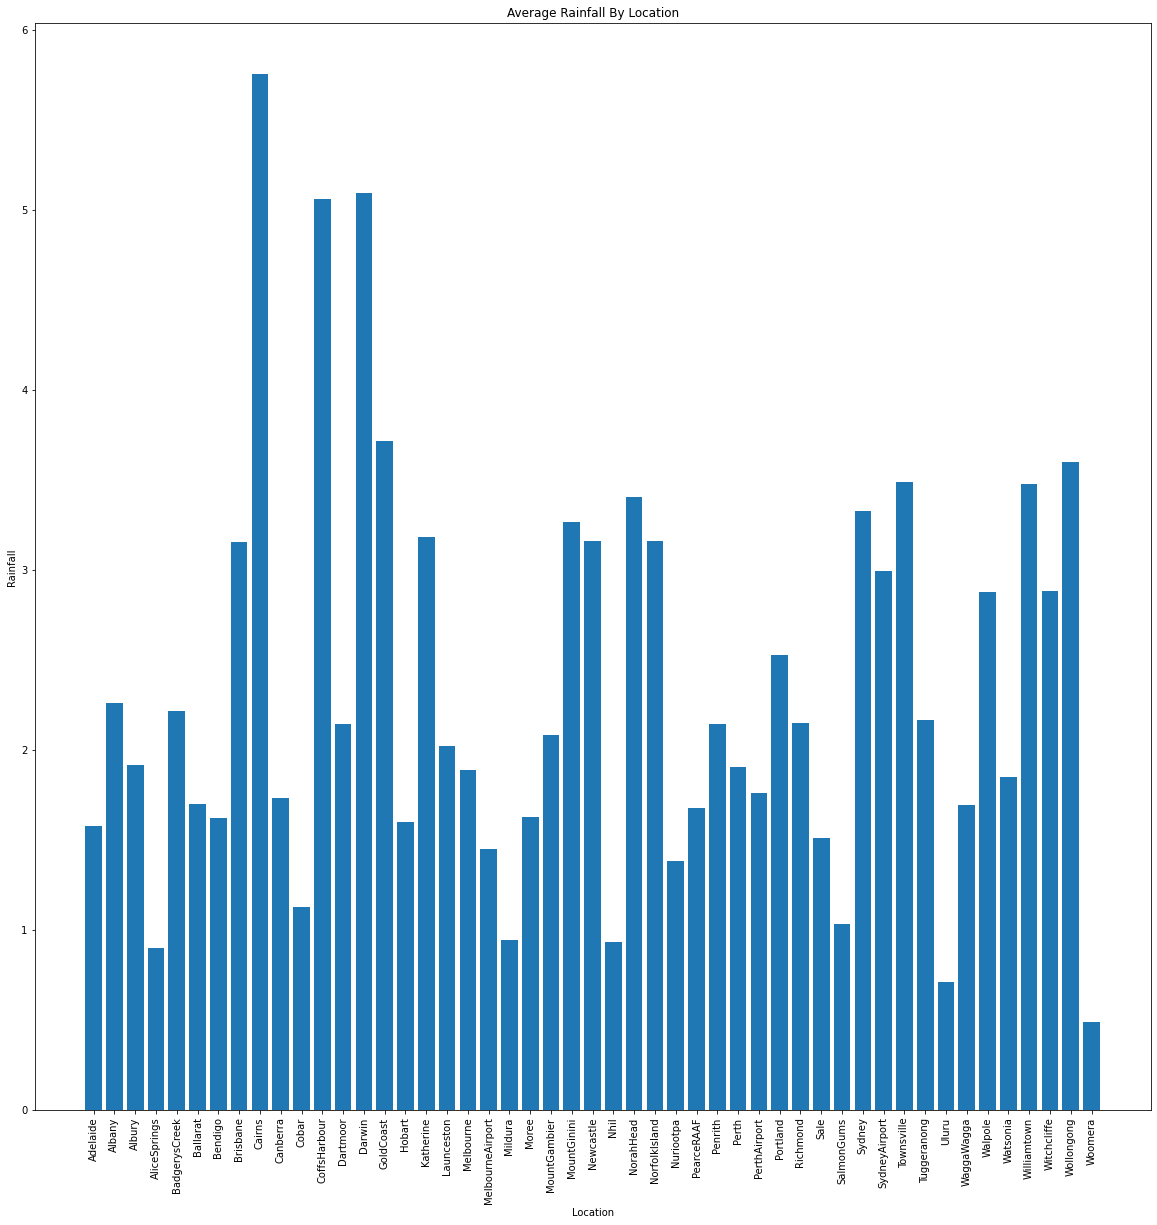

In [22]:
figure = plt.figure(figsize = (20,20))
plt.bar(group_by_loc['Location'], group_by_loc['Rainfall'])
plt.xlabel('Location')
plt.xticks(rotation = 90)
plt.ylabel('Rainfall')
plt.title('Average Rainfall By Location')


plt.show()

In [23]:
aus.head()

,Date,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow
0,12/2008,Albury,0.6,W,W,WNW,20.0,24.0,8.0,0.0,No,0.0,No
1,12/2008,Albury,0.0,WNW,NNW,WSW,4.0,22.0,8.0,0.0,No,0.0,No
2,12/2008,Albury,0.0,WSW,W,WSW,19.0,26.0,8.0,2.0,No,0.0,No
3,12/2008,Albury,0.0,NE,SE,E,11.0,9.0,8.0,2.0,No,1.0,No
4,12/2008,Albury,1.0,W,ENE,NW,7.0,20.0,7.0,8.0,No,0.2,No


In [24]:
aus['Date'].value_counts()

08/2016    1515
07/2016    1511
05/2016    1506
05/2017    1501
12/2013    1500
           ... 
06/2008      60
02/2008      58
12/2007      31
01/2008      31
11/2007      30
Name: Date, Length: 113, dtype: int64

In [25]:
# separating the Date into Month and Year
aus['Month'] = aus['Date'].astype(str).str[:2]
aus['Year'] = aus['Date'].astype(str).str[3:8]
aus.head()

,Date,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow,Month,Year
0,12/2008,Albury,0.6,W,W,WNW,20.0,24.0,8.0,0.0,No,0.0,No,12,2008
1,12/2008,Albury,0.0,WNW,NNW,WSW,4.0,22.0,8.0,0.0,No,0.0,No,12,2008
2,12/2008,Albury,0.0,WSW,W,WSW,19.0,26.0,8.0,2.0,No,0.0,No,12,2008
3,12/2008,Albury,0.0,NE,SE,E,11.0,9.0,8.0,2.0,No,1.0,No,12,2008
4,12/2008,Albury,1.0,W,ENE,NW,7.0,20.0,7.0,8.0,No,0.2,No,12,2008


In [26]:
# line plot of rainfall by month then year

line_plot_df = aus[['Month']]
line_plot_df.head()

# mapping the numerical months to month labels
mymap = {'01':'January', '02':'February', '03':'March',
         '04':'April', '05':'May','06':'June',
         '07':'July', '08':'August', '09':'September',
         '10': 'October', '11':'November', '12':'December'}

line_plot_df = line_plot_df.applymap(lambda s: mymap.get(s) if s in mymap else s)

# month and years lists
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

# adding in the Year and rainfall columns
line_plot_df['Year'] = aus[['Year']]
line_plot_df['Rainfall'] = aus[['Rainfall']]

# convert the columns to categorical and ordered
line_plot_df.Month = pd.Categorical(line_plot_df.Month, categories=months, ordered=True)
line_plot_df.Year = pd.Categorical(line_plot_df.Year, categories=years, ordered=True)
line_plot_df.head()

,Month,Year,Rainfall
0,December,2008,0.6
1,December,2008,0.0
2,December,2008,0.0
3,December,2008,0.0
4,December,2008,1.0


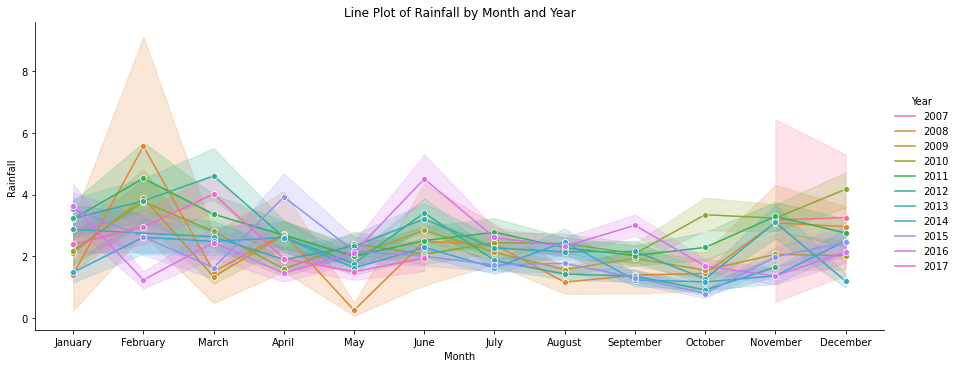

In [27]:
# plotting
line_plot = sns.relplot(kind='line', data=line_plot_df, x='Month', y='Rainfall', hue='Year', aspect=2.5, marker='o').set(title='Line Plot of Rainfall by Month and Year')
line_plot

In [28]:
# find the mean of windspeed

wind_speed_df = aus.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
wind_speed_df = wind_speed_df.reset_index()

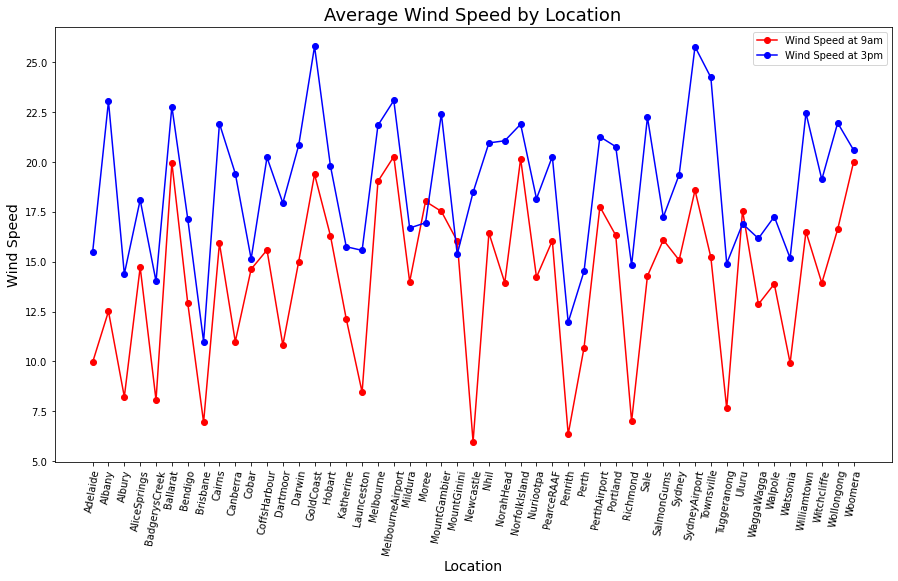

In [29]:
x = wind_speed_df.loc[:, 'Location']
y1 = wind_speed_df['WindSpeed9am'] 
y2 = wind_speed_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'red', label = 'Wind Speed at 9am') 
plt.plot(x, y2, marker='o', color = 'blue', label = 'Wind Speed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Wind Speed', fontsize = 14)
plt.title('Average Wind Speed by Location', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

In [30]:
# find the mean of cloud coverage

cloud_df = aus.groupby(['Location'])[['Cloud9am', 'Cloud3pm']].mean()
cloud_df = cloud_df.reset_index()

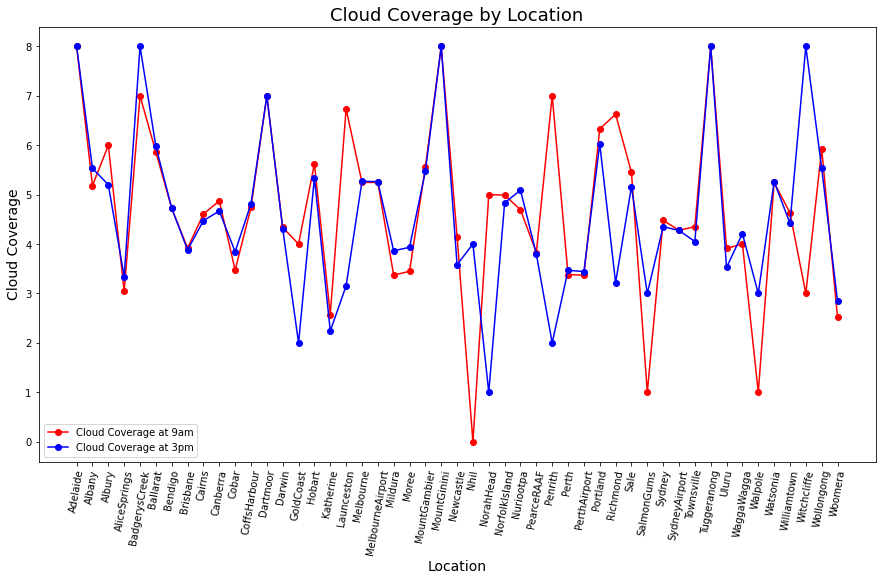

In [31]:
x = cloud_df.loc[:, 'Location']
y1 = cloud_df['Cloud9am'] 
y2 = cloud_df['Cloud3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'red', label = 'Cloud Coverage at 9am') 
plt.plot(x, y2, marker='o', color = 'blue', label = 'Cloud Coverage at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Cloud Coverage', fontsize = 14)
plt.title('Cloud Coverage by Location', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

### Data Preprocessing for Naive Bayes Algorithm

In [32]:
aus.head()

,Date,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow,Month,Year
0,12/2008,Albury,0.6,W,W,WNW,20.0,24.0,8.0,0.0,No,0.0,No,12,2008
1,12/2008,Albury,0.0,WNW,NNW,WSW,4.0,22.0,8.0,0.0,No,0.0,No,12,2008
2,12/2008,Albury,0.0,WSW,W,WSW,19.0,26.0,8.0,2.0,No,0.0,No,12,2008
3,12/2008,Albury,0.0,NE,SE,E,11.0,9.0,8.0,2.0,No,1.0,No,12,2008
4,12/2008,Albury,1.0,W,ENE,NW,7.0,20.0,7.0,8.0,No,0.2,No,12,2008


In [33]:
# remove the Date Column and store this in a new variable
drop_date = aus.drop(columns = 'Date')
drop_date.head()

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow,Month,Year
0,Albury,0.6,W,W,WNW,20.0,24.0,8.0,0.0,No,0.0,No,12,2008
1,Albury,0.0,WNW,NNW,WSW,4.0,22.0,8.0,0.0,No,0.0,No,12,2008
2,Albury,0.0,WSW,W,WSW,19.0,26.0,8.0,2.0,No,0.0,No,12,2008
3,Albury,0.0,NE,SE,E,11.0,9.0,8.0,2.0,No,1.0,No,12,2008
4,Albury,1.0,W,ENE,NW,7.0,20.0,7.0,8.0,No,0.2,No,12,2008


In [34]:
drop_date['WindGustDir'].value_counts()

W      17196
SE      9449
E       9199
N       9115
SSE     9092
S       9046
WSW     9001
SW      8987
SSW     8686
WNW     8191
NW      8122
ENE     8112
ESE     7416
NE      7167
NNW     6888
NNE     6526
Name: WindGustDir, dtype: int64

In [35]:
drop_date['WindDir9am'].value_counts()

N      12102
NW     10002
SE      9904
E       9525
SSE     9512
SW      9114
S       9108
W       8778
NNE     8473
NNW     8342
ENE     8198
NE      8184
SSW     8010
ESE     7983
WNW     7650
WSW     7308
Name: WindDir9am, dtype: int64

In [36]:
drop_date['WindDir3pm'].value_counts()

SE     11743
W      10043
SW     10012
S       9671
WSW     9426
SSE     9225
WNW     9200
N       8776
NW      8686
ESE     8446
E       8432
NE      8313
SSW     8079
NNW     7815
ENE     7805
NNE     6521
Name: WindDir3pm, dtype: int64

In [37]:
drop_date['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [38]:
# We need to encode the categorcial variables and since there are many features in each columner we will use the category encoders method
# https://towardsdatascience.com/feature-encoding-techniques-in-machine-learning-with-python-implementation-dbf933e64aa
encoder = ce.CountEncoder()

drop_date['WindGustDir'] = encoder.fit_transform(drop_date["WindGustDir"])
drop_date['WindDir9am'] = encoder.fit_transform(drop_date["WindDir9am"])
drop_date['WindDir3pm'] = encoder.fit_transform(drop_date["WindDir3pm"])
drop_date['Location'] = encoder.fit_transform(drop_date["Location"])
drop_date['Month'] = encoder.fit_transform(drop_date["Month"])

In [39]:
drop_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Location      142193 non-null  int64  
 1   Rainfall      142193 non-null  float64
 2   WindGustDir   142193 non-null  int64  
 3   WindDir9am    142193 non-null  int64  
 4   WindDir3pm    142193 non-null  int64  
 5   WindSpeed9am  142193 non-null  float64
 6   WindSpeed3pm  142193 non-null  float64
 7   Cloud9am      142193 non-null  float64
 8   Cloud3pm      142193 non-null  float64
 9   RainToday     142193 non-null  object 
 10  RISK_MM       142193 non-null  float64
 11  RainTomorrow  142193 non-null  object 
 12  Month         142193 non-null  int64  
 13  Year          142193 non-null  object 
dtypes: float64(6), int64(5), object(3)
memory usage: 20.3+ MB


In [40]:
# we will drop the drop the year column as this is not needed anymore 
drop_date.drop(columns = 'Year', inplace = True)

In [41]:
drop_date.head()

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow,Month
0,3011,0.6,17196,8778,9200,20.0,24.0,8.0,0.0,No,0.0,No,10810
1,3011,0.0,8191,8342,9426,4.0,22.0,8.0,0.0,No,0.0,No,10810
2,3011,0.0,9001,8778,9426,19.0,26.0,8.0,2.0,No,0.0,No,10810
3,3011,0.0,7167,9904,8432,11.0,9.0,8.0,2.0,No,1.0,No,10810
4,3011,1.0,17196,8198,8686,7.0,20.0,7.0,8.0,No,0.2,No,10810


In [42]:
## Conver teh target variable into 1 and 0, 1 is Yes and 0 is No
drop_date['RainTomorrow_encoded'] = 0
drop_date.loc[drop_date['RainTomorrow'] == 'Yes', 'RainTomorrow_encoded'] = 1
drop_date.loc[drop_date['RainTomorrow']== 'No', 'RainTomorrow_encoded'] = 0

In [43]:
drop_date.head()

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow,Month,RainTomorrow_encoded
0,3011,0.6,17196,8778,9200,20.0,24.0,8.0,0.0,No,0.0,No,10810,0
1,3011,0.0,8191,8342,9426,4.0,22.0,8.0,0.0,No,0.0,No,10810,0
2,3011,0.0,9001,8778,9426,19.0,26.0,8.0,2.0,No,0.0,No,10810,0
3,3011,0.0,7167,9904,8432,11.0,9.0,8.0,2.0,No,1.0,No,10810,0
4,3011,1.0,17196,8198,8686,7.0,20.0,7.0,8.0,No,0.2,No,10810,0


In [44]:
# Drop the original target column since we created a new one that is encoded.
clean_df = drop_date.drop(columns = 'RainTomorrow')


In [45]:
clean_df.head()

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,Month,RainTomorrow_encoded
0,3011,0.6,17196,8778,9200,20.0,24.0,8.0,0.0,No,0.0,10810,0
1,3011,0.0,8191,8342,9426,4.0,22.0,8.0,0.0,No,0.0,10810,0
2,3011,0.0,9001,8778,9426,19.0,26.0,8.0,2.0,No,0.0,10810,0
3,3011,0.0,7167,9904,8432,11.0,9.0,8.0,2.0,No,1.0,10810,0
4,3011,1.0,17196,8198,8686,7.0,20.0,7.0,8.0,No,0.2,10810,0


In [46]:
clean_df['RainTomorrow_encoded'].value_counts()

0    110316
1     31877
Name: RainTomorrow_encoded, dtype: int64

In [47]:
# Now we need to split the data set into X and y sets
X = clean_df.drop(columns = 'RainTomorrow_encoded')
X = pd.get_dummies(X)
y = clean_df['RainTomorrow_encoded'].to_frame()

In [48]:
# use train test split to split the data into training and testing sets
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)

In [49]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_scaled =  robust_scaler.transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

In [50]:
## Since our target data is heavily unbalanced we will need to use an oversampler to balance the data, we will use the SMOTE technique at first 
## then try a few others to see which one performs best

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=.3).fit_resample(
X_train_scaled, y_train)


In [51]:
gnb = GaussianNB()
gnb.fit(X_resampled, y_resampled)
train_predictions = gnb.predict(X_train_scaled)
test_predictions = gnb.predict(X_test_scaled)

In [52]:
# build confusion matrix
confusion_matrix1 = confusion_matrix(y_test, test_predictions)
cm_df = pd.DataFrame(
    confusion_matrix1, index=["Predicted No", "Predicted Yes"], columns=["Actual No", "Actual Yes"]
)

acc_score = accuracy_score(y_test, test_predictions)

In [53]:
# build confusion matrix
confusion_matrix2 = confusion_matrix(y_train, train_predictions)
cm_df_2 = pd.DataFrame(
    confusion_matrix2, index=["Predicted No", "Predicted Yes"], columns=["Actual No", "Actual Yes"]
)

acc_score_2 = accuracy_score(y_train, train_predictions)

In [54]:
# Displaying results
print("Confusion Matrix Test")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report Test")
print(classification_report(y_test, test_predictions))

Confusion Matrix Test


,Actual No,Actual Yes
Predicted No,26117,1484
Predicted Yes,0,7948


Accuracy Score : 0.9582548032293454
Classification Report Test
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     27601
           1       0.84      1.00      0.91      7948

    accuracy                           0.96     35549
   macro avg       0.92      0.97      0.94     35549
weighted avg       0.96      0.96      0.96     35549



In [55]:
print("Confusion Matrix Train")
display(cm_df_2)
print(f"Accuracy Score : {acc_score_2}")
print("Classification Report Test")
print(classification_report(y_train, train_predictions))

Confusion Matrix Train


,Actual No,Actual Yes
Predicted No,78197,4518
Predicted Yes,0,23929


Accuracy Score : 0.957634747383819
Classification Report Test
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     82715
           1       0.84      1.00      0.91     23929

    accuracy                           0.96    106644
   macro avg       0.92      0.97      0.94    106644
weighted avg       0.96      0.96      0.96    106644



### Random Forest Algorithim 

In [56]:
# convert RainToday into dummy variables (0 = No, 1 =Yes)

clean_df['RainToday_encoded'] = 0
clean_df.loc[clean_df['RainToday'] == 'Yes', 'RainToday_encoded'] = 1
clean_df.loc[clean_df['RainToday']== 'No', 'RainToday_encoded'] = 0

In [57]:
#remove RainToday column 

clean_df = clean_df.drop(columns = 'RainToday')

In [58]:
clean_df.head()

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RISK_MM,Month,RainTomorrow_encoded,RainToday_encoded
0,3011,0.6,17196,8778,9200,20.0,24.0,8.0,0.0,0.0,10810,0,0
1,3011,0.0,8191,8342,9426,4.0,22.0,8.0,0.0,0.0,10810,0,0
2,3011,0.0,9001,8778,9426,19.0,26.0,8.0,2.0,0.0,10810,0,0
3,3011,0.0,7167,9904,8432,11.0,9.0,8.0,2.0,1.0,10810,0,0
4,3011,1.0,17196,8198,8686,7.0,20.0,7.0,8.0,0.2,10810,0,0


In [59]:
# Identify X and Y variables 

y = clean_df['RainTomorrow_encoded']
X = clean_df.drop(columns=['RainTomorrow_encoded'])

In [60]:
# Split data into test and training set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 1)

In [61]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (113754, 12)
Y train shape:  (113754,)
X test shape:  (28439, 12)
Y test shape:  (28439,)


In [62]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_scaled =  robust_scaler.transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

In [63]:
# scaling data to balance 

X_resampled, y_resampled = SMOTE(random_state = 1, sampling_strategy = 0.3).fit_resample(X_train_scaled, y_train)

In [64]:
print('X resampeled shape: ', X_resampled.shape)
print('y resampled shape: ', y_resampled.shape)
print('X test shape: ', X_test_scaled.shape)
print('y test shape: ', y_test.shape)

X resampeled shape:  (114622, 12)
y resampled shape:  (114622,)
X test shape:  (28439, 12)
y test shape:  (28439,)


In [65]:
# define and train model

rf01 = RandomForestClassifier(n_estimators = 100, 
                              criterion = "gini").fit(X_resampled, y_resampled)

In [66]:
# predict values

y_predict1 = rf01.predict(X_test)

In [67]:
rf01_confusion_matrix = confusion_matrix(y_test, y_predict1)

rf01_cm = pd.DataFrame(rf01_confusion_matrix, index = ["Predicted No", "Predicted Yes"], columns = 
                       ["Actual No", "Actual Yes"])

rf01_cm

,Actual No,Actual Yes
Predicted No,22145,0
Predicted Yes,322,5972


In [68]:
acc_score_3 = accuracy_score(y_test, y_predict1)

print(f"Accuracy Score : {acc_score_3}")

Accuracy Score : 0.9886775203066211


In [69]:
print("Classification Report Test")
print(classification_report(y_test, y_predict1))

Classification Report Test
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22145
           1       1.00      0.95      0.97      6294

    accuracy                           0.99     28439
   macro avg       0.99      0.97      0.98     28439
weighted avg       0.99      0.99      0.99     28439



### Logistic Regression Model

In [70]:
# Using the clean_df dataframe defined above, rename it into another dataframe for manipulation
log_reg_dat = aus.drop(columns = ['Date','Year'])
log_reg_dat.head()

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow,Month
0,Albury,0.6,W,W,WNW,20.0,24.0,8.0,0.0,No,0.0,No,12
1,Albury,0.0,WNW,NNW,WSW,4.0,22.0,8.0,0.0,No,0.0,No,12
2,Albury,0.0,WSW,W,WSW,19.0,26.0,8.0,2.0,No,0.0,No,12
3,Albury,0.0,NE,SE,E,11.0,9.0,8.0,2.0,No,1.0,No,12
4,Albury,1.0,W,ENE,NW,7.0,20.0,7.0,8.0,No,0.2,No,12


In [71]:
# Redfining the object variables into categorical
log_reg_dat[["WindGustDir","WindDir9am","WindDir3pm","RainToday","Month","RainTomorrow"]] = log_reg_dat[["WindGustDir","WindDir9am","WindDir3pm","RainToday","Month","RainTomorrow"]].astype("category")
log_reg_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Location      142193 non-null  object  
 1   Rainfall      142193 non-null  float64 
 2   WindGustDir   142193 non-null  category
 3   WindDir9am    142193 non-null  category
 4   WindDir3pm    142193 non-null  category
 5   WindSpeed9am  142193 non-null  float64 
 6   WindSpeed3pm  142193 non-null  float64 
 7   Cloud9am      142193 non-null  float64 
 8   Cloud3pm      142193 non-null  float64 
 9   RainToday     142193 non-null  category
 10  RISK_MM       142193 non-null  float64 
 11  RainTomorrow  142193 non-null  category
 12  Month         142193 non-null  category
dtypes: category(6), float64(6), object(1)
memory usage: 13.5+ MB


In [72]:
log_reg_dat.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [73]:
# rebalancing the data so that 30% of the RainTomorrow is "yes"

to_resample = log_reg_dat.loc[log_reg_dat['RainTomorrow'] == "Yes"]
our_resample = to_resample.sample(n = 15401, replace =True)
log_reg_dat_rebal = pd.concat([log_reg_dat, our_resample])

In [74]:
log_reg_dat_rebal.RainTomorrow.value_counts()

No     110316
Yes     47278
Name: RainTomorrow, dtype: int64

In [75]:
# Seperating the variables into predictors and response
X_logreg = log_reg_dat_rebal.drop(columns = ['RainTomorrow', 'WindDir9am','WindDir3pm'])
X_logreg.head()

,Location,Rainfall,WindGustDir,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,Month
0,Albury,0.6,W,20.0,24.0,8.0,0.0,No,0.0,12
1,Albury,0.0,WNW,4.0,22.0,8.0,0.0,No,0.0,12
2,Albury,0.0,WSW,19.0,26.0,8.0,2.0,No,0.0,12
3,Albury,0.0,NE,11.0,9.0,8.0,2.0,No,1.0,12
4,Albury,1.0,W,7.0,20.0,7.0,8.0,No,0.2,12


In [76]:
# changing the y variable into 0 and 1 instead of yes and no
y_logreg = log_reg_dat_rebal[['RainTomorrow']]
y_logreg['RainTomorrow'] = pd.factorize(y_logreg['RainTomorrow'])[0]
#y_logreg.value_counts()


In [77]:
# use train test split to split the data into training and testing sets
# split the data into training and testing sets
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_logreg, 
                                                    y_logreg, 
                                                    random_state=1)

In [78]:
# standardizing the numeric variables
X_train_logreg[["Rainfall","WindSpeed9am","WindSpeed3pm", "Cloud9am","Cloud3pm","RISK_MM"]] = preprocessing.scale(X_train_logreg[["Rainfall","WindSpeed9am","WindSpeed3pm", "Cloud9am","Cloud3pm","RISK_MM"]])
X_train_logreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118195 entries, 83563 to 128037
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Location      118195 non-null  object  
 1   Rainfall      118195 non-null  float64 
 2   WindGustDir   118195 non-null  category
 3   WindSpeed9am  118195 non-null  float64 
 4   WindSpeed3pm  118195 non-null  float64 
 5   Cloud9am      118195 non-null  float64 
 6   Cloud3pm      118195 non-null  float64 
 7   RainToday     118195 non-null  category
 8   RISK_MM       118195 non-null  float64 
 9   Month         118195 non-null  category
dtypes: category(3), float64(6), object(1)
memory usage: 7.6+ MB


In [79]:
# Using the encoding scheme that was mentioned above in the Bayes network model
logreg_encoder = ce.CountEncoder()

X_train_logreg['WindGustDir'] = logreg_encoder.fit_transform(X_train_logreg["WindGustDir"])
X_train_logreg['Location'] = logreg_encoder.fit_transform(X_train_logreg["Location"])
X_train_logreg['Month'] = logreg_encoder.fit_transform(X_train_logreg["Month"])
X_train_logreg['RainToday'] = logreg_encoder.fit_transform(X_train_logreg["RainToday"])
X_train_logreg.head()

,Location,Rainfall,WindGustDir,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,Month
83563,2658,0.853114,7582,-0.908322,-1.636840,0.045401,0.094002,29170,0.587705,9431
12993,2301,-0.295039,6053,0.650748,-0.431789,-1.362027,0.094002,89025,-0.138084,8737
41972,2538,-0.295039,6053,-0.574235,-0.869990,1.100972,1.175466,89025,-0.324716,9849
65970,2056,-0.295039,7445,1.875731,1.540112,0.749115,0.814978,89025,-0.324716,8737
37361,2389,0.658144,7341,-0.574235,-0.212689,0.749115,0.814978,29170,2.205178,10795


Validating the logistic regresion model but with the test set now.

In [80]:
# Building the logistic regression model with the training data and printing out the intercept
logreg = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_logreg, y_train_logreg)
logreg.intercept_

array([-2.66514887e-07])

In [81]:
# coefficients
logreg.coef_

array([[ 4.61531836e-04,  4.11844483e-05,  1.16004790e-05,
         3.60675922e-05,  3.59859783e-05,  8.45577769e-05,
         1.11536770e-04, -2.59336019e-05,  2.30275618e-04,
        -2.25169637e-05]])

In [82]:
# confusion matrix
confusion_matrix(y_train_logreg, logreg.predict(X_train_logreg))

array([[70310, 12450],
       [19258, 16177]], dtype=int64)

In [83]:
# Accuracy Score
logreg.score(X_train_logreg, y_train_logreg)

0.7317314607216887

Validating the logistic regresion model but with the test set now.

In [84]:
# X_test_logreg
# y_test_logreg

X_test_logreg[["Rainfall","WindSpeed9am","WindSpeed3pm", "Cloud9am","Cloud3pm","RISK_MM"]] = preprocessing.scale(X_test_logreg[["Rainfall","WindSpeed9am","WindSpeed3pm", "Cloud9am","Cloud3pm","RISK_MM"]])
X_test_logreg[["WindGustDir","RainToday","Month"]] = X_test_logreg[["WindGustDir","RainToday","Month"]].astype("category")

X_test_logreg.head()


,Location,Rainfall,WindGustDir,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,Month
43153,Wollongong,-0.293788,NE,-0.574266,0.108006,0.747143,0.811516,No,-0.327273,02
107685,Albany,-0.293788,W,2.110935,0.760150,0.747143,0.089062,No,-0.327273,11
107225,Albany,-0.293788,W,-0.798032,0.108006,1.099864,1.172743,No,0.830320,06
42814,Wollongong,-0.293788,NNW,0.656451,0.542769,1.099864,0.450289,No,-0.327273,03
99098,MountGambier,-0.293788,ENE,0.656451,0.977531,1.099864,0.811516,No,-0.327273,01


In [85]:
# Using the encoding scheme that was mentioned above in the Bayes network model
logreg_encoder = ce.CountEncoder()

X_test_logreg['WindGustDir'] = logreg_encoder.fit_transform(X_test_logreg['WindGustDir'])
X_test_logreg['Location'] = logreg_encoder.fit_transform(X_test_logreg['Location'])
X_test_logreg['Month'] = logreg_encoder.fit_transform(X_test_logreg['Month'])
X_test_logreg['RainToday'] = logreg_encoder.fit_transform(X_test_logreg['RainToday'])

X_test_logreg.head()

,Location,Rainfall,WindGustDir,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,Month
43153,793,-0.293788,1964,-0.574266,0.108006,0.747143,0.811516,29586,-0.327273,2865
107685,866,-0.293788,4855,2.110935,0.760150,0.747143,0.089062,29586,-0.327273,3233
107225,866,-0.293788,4855,-0.798032,0.108006,1.099864,1.172743,29586,0.830320,3532
42814,793,-0.293788,1943,0.656451,0.542769,1.099864,0.450289,29586,-0.327273,3581
99098,883,-0.293788,2185,0.656451,0.977531,1.099864,0.811516,29586,-0.327273,3480


In [86]:
# validating model above but with test data now and displaying the intercept
logreg2 = LogisticRegression(solver='liblinear', random_state=0).fit(X_test_logreg, y_test_logreg)
logreg2.intercept_

array([-0.03197579])

In [87]:
# coefficients for the model
logreg2.coef_

array([[ 3.35605553e-04,  7.82677084e-02,  3.29623057e-05,
         8.16372131e-02,  1.37031007e-01,  1.50381895e-01,
         3.27835132e-01, -4.12844936e-05,  4.25866842e+00,
         7.39524524e-05]])

In [88]:
# Evaluating the model using the Training data to predict the y labels
confusion_matrix(y_test_logreg, logreg2.predict(X_test_logreg))

array([[27519,    37],
       [ 3783,  8060]], dtype=int64)

In [89]:
# Accuracy Score
logreg2.score(X_test_logreg, y_test_logreg)

0.903043224447321

In [90]:
print(classification_report(y_test_logreg, logreg2.predict(X_test_logreg)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     27556
           1       1.00      0.68      0.81     11843

    accuracy                           0.90     39399
   macro avg       0.94      0.84      0.87     39399
weighted avg       0.91      0.90      0.90     39399

